### Mes librairies

In [463]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### Tous les CSV

In [464]:
df1106 = pd.read_csv("wttj-1106.csv")
df1906 = pd.read_csv("wttj-1906.csv")
df2006 = pd.read_csv("wttj-2006.csv")
df2106 = pd.read_csv("wttj_21-06_00-00.csv")
df2406 = pd.read_csv("wttj_24-06_11-23.csv")

In [465]:
df_wttj_concat = pd.concat([df1106,df1906,df2006,df2106,df2406])

In [466]:
df_wttj_concat.shape

(1951, 77)

### Je teste sur un groupe de doublons

In [467]:
display(df_wttj_concat["job.reference"])

0       WEWYS_awa6O5O
1       WEWYS_0oMzN3l
2       DDLDL_xxVjO31
3       TOUCA_Lld2zk5
4       EXTIA_g2pAGe3
5       SORAR_wQkJRQk
6       QONTO_LlJMZ23
7       QONTO_xrlmrVw
8         RDI_zjrNDOO
9         LHG_3mY5Npe
10      BIALX_PqooYaX
11      INWEE_JpdZKWR
12       FREE_o6dXQ60
13      BLUEC_1k64d6L
14      ORNIK_ONRRL2k
15      ORNIK_V7ZOPlN
16      FABER_qx8eGOg
17         DC_5KG03ZX
18        MJG_o6r3MGD
19         GM_rXWZkxG
20      PAPER_yWwAb9O
21      HUBLO_bR85090
22         AC_bNz65g0
23       HSBC_567XRrx
24      BLABL_8ZqDb2K
25      HERMS_e8a6woQ
26        AXA_Pj9zP2k
27      AIRBU_p6MZ9Jr
28      AIRBU_yw68m8g
29      EURED_1NP7WD6
30       BEEM_Q22ezp6
31      SANCA_xy8J5gr
32      STAGO_6KoyNwq
33        TPC_L2mY4mG
34        FTP_VYr2JeJ
35      WIFIR_5Oa8P5x
36        AXA_D26VwwX
37        AXA_rxpD9M9
38        AXA_yoroNWZ
39          DD_QxQ6GP
40         DD_WmedlJA
41         SS_54O515K
42      ORANG_kNMRW0z
43      STOCK_w35k36b
44      STOCK_rgmG98G
45      ST

In [468]:
df_test = df_wttj_concat.loc[df_wttj_concat['job.reference'] == "WEWYS_0oMzN3l"]

In [469]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 to 103
Data columns (total 77 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   job.contract_duration_min                                                    0 non-null      float64
 1   job.salary_min                                                               0 non-null      float64
 2   job.remote                                                                   5 non-null      object 
 3   job.company_description                                                      0 non-null      object 
 4   job.language                                                                 5 non-null      object 
 5   job.contract_type                                                            5 non-null      object 
 6   job.reference                                    

In [470]:
df_test['job.organization.description_clean'].isna()

1       True
82      True
95      True
103    False
103     True
Name: job.organization.description_clean, dtype: bool

In [471]:
def fill_nan_diff(group):
    # Fill NaNs using ffill and bfill across rows
    filled_group = group.ffill().bfill()
    # Select the first row after filling NaNs
    return filled_group.iloc[0]

# Apply the function to each group defined by 'job.reference'
df_filled = df_test.groupby('job.reference').apply(fill_nan_diff).reset_index(drop=True)

print("\nDataFrame after filling NaNs across duplicates:")
display(df_filled)


DataFrame after filling NaNs across duplicates:


C:\Users\missm\AppData\Local\Temp\ipykernel_8260\2718275951.py:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\missm\AppData\Local\Temp\ipykernel_8260\2718275951.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



1,job.contract_duration_min,job.salary_min,job.remote,job.company_description,job.language,job.contract_type,job.reference,job.contract_duration_max,job.apply_url,job.salary_max,...,job.organization.gdpr_setting,job.organization.website_organization.i18n_descriptions.es,job.profile_clean,job.tools_clean,job.skills_clean,job.application_mandatory,job.organization.description_clean,job.description_clean,job.recruitment_process_clean,job.organization.sectors_clean
0,NaN,NaN,no,NaN,fr,full_time,WEWYS_0oMzN3l,NaN,NaN,NaN,...,NaN,NaN,Ce que nous aimons chez Wewyse : Les personnal...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']","Wewyse est le cabinet de conseil de Wemanity, ...",Être Consultant Data Management chez Wewyse c’...,NaN,"['Digital Marketing / Data Marketing', 'Digita..."


### Gestion des doublons dans le df concatené

#### Je les compte

In [472]:
print(df_wttj_concat.duplicated(subset='job.reference').sum())

1490


In [473]:
# fonction pour remplir les nan des doublons
def fill_nan_diff(group):
    
    # je commence par remplir avec les lignes avant et après
    filled_group = group.ffill().bfill()
    
    # puis je retourne uniquement la première ligne qui reçoit toutes les infos
    return filled_group.iloc[0]

In [474]:
# j'applique ma fonction en groupant mes doublons via groupby sur la job.reference
df_wttj = df_wttj_concat.groupby('job.reference').apply(fill_nan_diff).reset_index(drop=True)

display(df_wttj)

C:\Users\missm\AppData\Local\Temp\ipykernel_8260\3714961672.py:5: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\missm\AppData\Local\Temp\ipykernel_8260\2425543221.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,job.contract_duration_min,job.salary_min,job.remote,job.company_description,job.language,job.contract_type,job.reference,job.contract_duration_max,job.apply_url,job.salary_max,...,job.organization.gdpr_setting,job.organization.website_organization.i18n_descriptions.es,job.profile_clean,job.tools_clean,job.skills_clean,job.application_mandatory,job.organization.description_clean,job.description_clean,job.recruitment_process_clean,job.organization.sectors_clean
0,NaN,NaN,partial,NaN,en,full_time,5E_LqpgRQM,NaN,NaN,NaN,...,NaN,NaN,Your ProfileLocation: ParisExperience: 3+ year...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']",52 Entertainment is a leading e-gaming company...,We are looking for an experienced Game Analyst...,First interviews from May 23rd onward.Collecti...,"['Video Games', 'Video Games']"
1,NaN,NaN,no,<p><strong>Join us and be a pioneer for a gree...,en,full_time,AACC_GbrGNeA,NaN,https://taleez.com/apply/besoin-hr-data-analys...,NaN,...,NaN,NaN,Knowledge / Know how :Data Analysis Skills/ HR...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']",La mission d’ACC est d’accélérer la transition...,The HR Data Analyst will play a pivotal role i...,NaN,"['Specialised Engineering', 'Specialised Engin..."
2,NaN,NaN,punctual,<p>Participer pleinement à différents projets ...,fr,full_time,ACTIN_D9DqQ5N,NaN,NaN,NaN,...,NaN,NaN,"De formation Bac+5 en informatique, vous dispo...","['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']","Depuis 2014, nous accompagnons nos clients dan...",Vous serez amené⸱e à travailler sur différents...,Notre processus de recrutementTout au long du ...,"['Artificial Intelligence / Machine Learning',..."
3,NaN,NaN,punctual,<p>Participer pleinement à différents projets ...,fr,full_time,ACTIN_o8Ddy0,NaN,NaN,NaN,...,NaN,NaN,"De formation Bac+5 en informatique, vous dispo...","['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']","Depuis 2014, nous accompagnons nos clients dan...",Vous serez amené⸱e à travailler sur différents...,Notre processus de recrutementTout au long du ...,"['Artificial Intelligence / Machine Learning',..."
4,NaN,NaN,punctual,<p>Participer pleinement à différents projets ...,fr,full_time,ACTIN_wkzyZjd,NaN,NaN,NaN,...,NaN,NaN,"De formation Bac+5 en informatique, vous dispo...","['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']","Depuis 2014, nous accompagnons nos clients dan...",Vous serez amené⸱e à travailler sur différents...,Notre processus de recrutementTout au long du ...,"['Artificial Intelligence / Machine Learning',..."
5,NaN,NaN,partial,NaN,en,full_time,AC_1zd0j45,NaN,NaN,NaN,...,NaN,NaN,🏆 About youYour Skills :- Data managemen...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']",AXA Climate’s purpose is to make regenerative ...,🌎 Who we areAXA Climate is a Committed Climate...,NaN,"['Strategy', 'Strategy']"
6,NaN,NaN,no,NaN,fr,full_time,AC_bNz65g0,NaN,NaN,NaN,...,NaN,NaN,🦸 Votre profil :Vous êtes issu(e) d’une format...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée créat...","['cover_letter', 'resume']",Si vous recherchez un cabinet à taille humaine...,Nous recherchons un Consultant Senior Data &am...,🔎 Etape 1 : Rencontre avec un de nos recruteur...,"['IT / Digital', 'IT / Digital']"
7,NaN,NaN,punctual,<p><strong>Archery Data &amp; Analytics</stron...,fr,full_time,ADAA_5k5p88K,NaN,NaN,NaN,...,NaN,NaN,Avoir une expérience sur un poste similaire id...,"['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']","['Compétences en communication', 'Pensée c

In [475]:
df_wttj.columns

Index(['job.contract_duration_min', 'job.salary_min', 'job.remote',
       'job.company_description', 'job.language', 'job.contract_type',
       'job.reference', 'job.contract_duration_max', 'job.apply_url',
       'job.salary_max', 'job.education_level', 'job.wttj_reference',
       'job.name', 'job.status', 'job.description', 'job.office.address',
       'job.office.local_address', 'job.office.city', 'job.office.latitude',
       'job.office.longitude', 'job.office.district',
       'job.office.country_code', 'job.office.zip_code',
       'job.office.local_city', 'job.office.local_district',
       'job.organization.nb_employees', 'job.organization.parity_men',
       'job.organization.media_website_url', 'job.organization.reference',
       'job.organization.has_external_ats', 'job.organization.jobs_count',
       'job.organization.revenue', 'job.organization.name',
       'job.organization.average_age', 'job.organization.default_language',
       'job.organization.industry', 'job.

In [476]:
df_wttj[['job.company_description',"job.organization.description","job.organization.description_clean"]].sample(20)

,job.company_description,job.organization.description,job.organization.description_clean
27,NaN,<p>Apiday is a next-generation of sustainabili...,NaN
371,NaN,<p>Publicis Sapient agit depuis plus de 30 ans...,NaN
83,NaN,"<p>Aujourd’hui, nous sommes une équipe mondial...","Aujourd’hui, nous sommes une équipe mondiale, ..."
252,NaN,<p>JCDecaux est une entreprise familiale franç...,NaN
39,NaN,<p>Avec 6 000 recrutements par an en France re...,NaN
47,NaN,<p>Avec 6 000 recrutements par an en France re...,Avec 6 000 recrutements par an en France rejoi...
158,NaN,"<p>Leader en data science, Ekimetrics fournit ...","Leader en data science, Ekimetrics fournit des..."
191,<p>EY Consulting accompagne ses clients dans l...,<p><strong>“Building a better working world”</...,“Building a better working world”Aider les pio...
363,NaN,<p>Le pass Culture est l’une des réformes prio...,NaN
368,NaN,"<p>Leader français du marketing, de la communi...",NaN


### Je repasse les fonctions de nettoyage pour les vieux CSV qui auraient raté certains fonctions
plus nécessaire à partir d'aujourd'hui

In [477]:
############## Mes fonctions ####################################

### enlever les baslises html
def remove_html_tags(text_col):
    if text_col is None:
        return None
    else:
        clean = re.compile('<.*?>')
        return re.sub(clean,"", text_col)


In [478]:
# 4.2 je passe toutes mes fonctions

# html cleaner
### faire un if none pass sinon
df_wttj[["job.organization.description_cleaned"]] = df_wttj[["job.organization.description"]].map(remove_html_tags).copy()

In [479]:
df_wttj["job.company_description_clean"] = df_wttj["job.company_description"].astype(str).apply(lambda x: remove_html_tags(x))

In [480]:
df_welcomejungle = df_wttj.drop(columns=["job.organization.description", "job.company_description", "job.organization.description_cleaned"])

In [481]:
df_welcome = df_welcomejungle.rename(columns={"job.organization.description_cleaned": "job.organization.description_clean"})

In [484]:
# FONCTION de conversion en date qq soit le format
def convert_year_to_date(value):
    try:
        # Convertir la valeur en int, puis en string et enfin en datetime avec le format %Y
        year_str = str(int(value))
        return pd.to_datetime(year_str, format='%Y').strftime('%Y')
    except:                                                                       # Je retourne la valeur originale si ce n'est pas une date
      return value

In [487]:
df_welcome['job.organization.creation_year_date'] = df_welcome['job.organization.creation_year'].apply(convert_year_to_date)                             # j'applique la fonction à la colonne

In [488]:
df_welcome['job.organization.creation_year_date'] 

0        2016
1        2020
2        2014
3        2014
4        2014
5        2019
6        2007
7        2021
8        2021
9        2021
10       1987
11        NaN
12       1890
13       1890
14        NaN
15       1890
16       1890
17       2005
18       2012
19       1970
20       1970
21       1970
22       1970
23       2014
24       2022
25       2000
26       2019
27       2021
28       1976
29       2016
30       2014
31       2014
32       2014
33       2014
34       2014
35       2014
36       2014
37       1993
38       2022
39       1985
40       1985
41       1985
42       1985
43       1985
44       1985
45       1985
46       1985
47       1985
48       1985
49       1985
50       1985
51       1985
52       1985
53       1985
54       1985
55       2014
56       2005
57       2000
58       2019
59       2005
60       2009
61       2009
62       2005
63       2005
64       2007
65       2007
66       2007
67       2018
68       2006
69       2020
70       2016
71    

In [490]:
df_welcome = df_welcome.drop(columns='job.organization.creation_year')

### J'explore un peu

#### Les niveaux de remplissage

<Axes: >

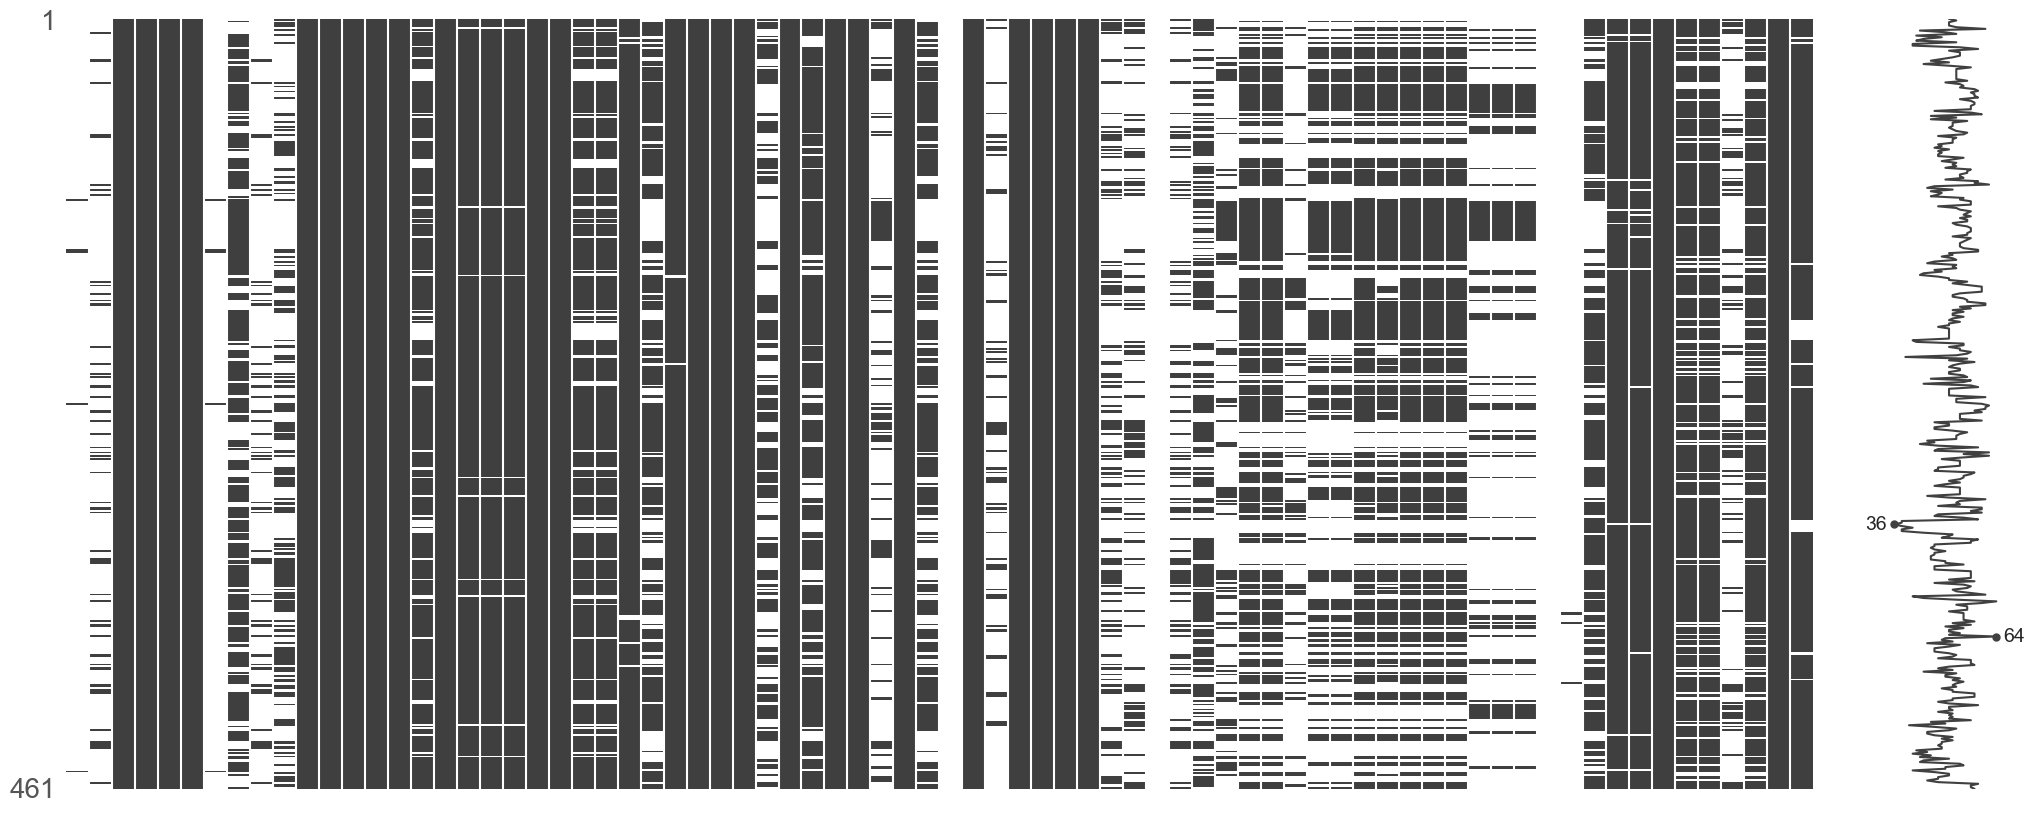

In [491]:
msno.matrix(df_welcome)

In [492]:
pd.set_option('display.max_rows', None)
print("Taux de remplissage par colonne : \n")
print(abs(round(((df_welcome.isnull().mean() * 100)-100).sort_values(ascending=True), 1)).astype(str) + ' %')

Taux de remplissage par colonne : 

job.office.zip_code                                                            100.0 %
job.profession.category_name.fr                                                100.0 %
job.published_at                                                               100.0 %
job.profession.sub_category_name.fr                                            100.0 %
job.company_description_clean                                                  100.0 %
job.organization.profile_type                                                  100.0 %
job.organization.industry                                                      100.0 %
job.organization.default_language                                              100.0 %
job.organization.name                                                          100.0 %
job.organization.jobs_count                                                    100.0 %
job.organization.has_external_ats                                              100.0 %
job.org

In [493]:
df_welcome.shape

(461, 76)

#### Les max, min, mean, median

In [494]:
display(df_welcome.describe().T)

,count,mean,std,min,25%,50%,75%,max
job.contract_duration_min,5.0,32.400000,8.049845,18.00000,36.000000,36.000000,36.000000,36.00000
job.salary_min,62.0,43608.419355,19499.677298,35.00000,38650.000000,45000.000000,50000.000000,140000.00000
job.contract_duration_max,5.0,32.400000,8.049845,18.00000,36.000000,36.000000,36.000000,36.00000
job.salary_max,61.0,53485.491803,22769.820440,38.00000,45000.000000,55000.000000,60000.000000,140000.00000
job.office.latitude,452.0,48.177159,1.799425,43.11755,48.819677,48.871035,48.882580,50.67980
job.office.longitude,452.0,2.430002,1.445856,-4.48656,2.273505,2.333480,2.362115,7.74234
job.organization.nb_employees,454.0,18793.848018,56441.082324,4.00000,130.500000,950.000000,7200.000000,601000.00000
job.organization.parity_men,308.0,55.129870,11.902537,20.00000,49.750000,55.000000,65.000000,80.00000
job.organization.jobs_count,461.0,236.119306,382.692488,1.00000,13.000000,48.000000,312.000000,2212.00000
job.organization.average_age,372.0,33.629032,4.408032,27.00000,30.000000,33.000000,36.000000,45.00000


#### Des répartitions sur des éléments clés

##### Skills

In [ ]:
# SKILLS
display(df_welcome["job.skills_clean"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.skills_clean
['Compétences en communication', 'Pensée créative']                                               85.2%
['Entreposage de données', 'CRM', 'Attitude positive', "Outils d'automatisation du marketing"]    13.2%
['Collecte et analyse de données']                                                                 0.4%
['Réglementation environnementale']                                                                0.2%
['Formation et perfectionnement']                                                                  0.2%
['Analyse financière']                                                                             0.2%
['Contrôle qualité']                                                                               0.2%
['Aptitude à résoudre les problèmes']                                                              0.2%
Name: proportion, dtype: object

##### Tools

In [ ]:
# TOOLS
display(df_welcome["job.tools_clean"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.tools_clean
['Looker', 'Tableau', 'Sql', 'Jupyter', 'Python']                       84.3%
['Stitch', 'Dbt', 'Bigquery', 'Airbyte', 'Hubspot', 'Sql', 'Python']    13.1%
['Tableau']                                                              0.9%
['Kubernetes']                                                           0.2%
['Sql']                                                                  0.2%
['Alteryx']                                                              0.2%
['Power bi']                                                             0.2%
['Github']                                                               0.2%
['Microstrategy']                                                        0.2%
['Oracle']                                                               0.2%
['Nosql']                                                                0.2%
Name: proportion, dtype: object

##### Secteurs

In [ ]:
# SECTEURS
display(df_welcome["job.organization.sectors_clean"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.organization.sectors_clean
['IT / Digital', 'IT / Digital']                                                                20.3%
['Mobile Apps', 'Mobile Apps']                                                                  11.6%
['Artificial Intelligence / Machine Learning', 'Artificial Intelligence / Machine Learning']     8.6%
['Banking', 'Banking']                                                                           8.1%
['Digital Marketing / Data Marketing', 'Digital Marketing / Data Marketing']                     5.6%
['Software', 'Software']                                                                         4.6%
['Organization / Management', 'Organization / Management']                                       4.3%
['Strategy', 'Strategy']                                                                         4.1%
['Specialised Engineering', 'Specialised Engineering']                                           3.0%
['SaaS / Cloud Services', 'SaaS / Cloud Services'] 

##### Type de contrat

In [ ]:
# CONTRACTS
display(df_welcome["job.contract_type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.contract_type
full_time    95.9%
temporary     4.1%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.contract_type", histnorm="probability density")
fig.show()

##### Télétravail

In [ ]:
# REMOTE
display(df_welcome["job.remote"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.remote
partial     50.5%
no          31.7%
punctual    15.6%
fulltime     2.2%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.remote", histnorm="probability density")
fig.show()

##### Fonction pour nettoyer la mise en forme des niveaux d'expérience et d'étude

In [ ]:
### remplacer les catégories de niveau d'expérience
def experience_replace(experience):
    lower_exp = experience.lower()
    small_exp = lower_exp.replace("_", " ")
    return(small_exp)



In [ ]:
df_welcome["job.experience_level_clean"] = df_welcome["job.experience_level"].astype(str).apply(lambda x: experience_replace(x))
df_welcome["job.education_level_clean"] = df_welcome["job.education_level"].astype(str).apply(lambda x: experience_replace(x))

In [ ]:
df_welcome["job.education_level_clean"]

0           bac_5
1             NaN
2           bac_5
3           bac_5
4           bac_5
5             NaN
6           bac_5
7             NaN
8             NaN
9           bac_5
10            NaN
11            NaN
12            NaN
13            NaN
14          bac_2
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38          bac_5
39            NaN
40          bac_5
41            NaN
42            NaN
43          bac_5
44            NaN
45            NaN
46            NaN
47          bac_5
48            NaN
49            NaN
50            NaN
51            NaN
52            NaN
53            NaN
54            NaN
55        

##### Niveau d'expérience

In [ ]:
# NIVEAU D'EXPERIENCE
display(df_welcome["job.experience_level_clean"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.experience_level_clean
nan                   44.0%
5 to 7 years          13.7%
2 to 3 years          12.8%
3 to 4 years          11.7%
4 to 5 years           5.6%
less than 6 months     4.3%
1 to 2 years           3.7%
7 to 10 years          1.7%
6 months to 1 year     1.5%
10 to 15 years         0.9%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.experience_level_clean", histnorm="probability density")
fig.show()

##### Niveau d'étude

In [ ]:
# NIVEAU D'ETUDE
display(df_welcome["job.education_level_clean"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.education_level_clean
nan           59.2%
bac 5         34.7%
bac 3          3.0%
bac 2          1.3%
bac 4          0.9%
no diploma     0.7%
bac            0.2%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.education_level_clean", histnorm="probability density")
fig.show()

##### Salaires

In [ ]:
# SALAIRES
display(df_welcome["job.salary_max"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.salary_max
60000.0     14.8%
55000.0     11.5%
45000.0     11.5%
50000.0      8.2%
70000.0      4.9%
57000.0      4.9%
65000.0      4.9%
43000.0      3.3%
80000.0      3.3%
42000.0      3.3%
40000.0      3.3%
4300.0       3.3%
65.0         1.6%
52000.0      1.6%
50.0         1.6%
30862.0      1.6%
58000.0      1.6%
75000.0      1.6%
46000.0      1.6%
38.0         1.6%
51000.0      1.6%
62000.0      1.6%
140000.0     1.6%
110000.0     1.6%
90000.0      1.6%
63000.0      1.6%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.salary_max")
fig.show()

##### Index égalité

In [495]:
# INDEX EGALITE

print("La moyenne nationale pour l'index égalité femme/homme en 2023 était de 88 % \n")
print(f"La moyenne pour les annonces de WTTJ est de {round(df_welcome["job.organization.equality_indexes.equality_index"].mean(),1)} %")

display((df_welcome["job.organization.equality_indexes.equality_index"]
         .value_counts(normalize=True)
         .mul(100)
         .round(1)
         .astype(str) + '%')
        .sort_values(ascending=False))

La moyenne nationale pour l'index égalité femme/homme en 2023 était de 88 % 

La moyenne pour les annonces de WTTJ est de 89.3 %


job.organization.equality_indexes.equality_index
92.0      9.1%
94.0      8.1%
90.0      5.7%
88.0      5.7%
98.0      4.0%
82.0      3.4%
96.0      3.4%
91.0      3.0%
84.0      3.0%
87.0      3.0%
86.0      2.7%
85.0      2.7%
100.0     2.4%
95.0      2.0%
97.0      2.0%
89.0     18.9%
93.0     11.1%
99.0      1.7%
80.0      1.3%
81.0      1.0%
67.0      0.7%
74.0      0.7%
75.0      0.3%
79.0      0.3%
62.0      0.3%
69.0      0.3%
58.0      0.3%
83.0      0.3%
45.0      0.3%
71.0      0.3%
43.0      0.3%
41.0      0.3%
77.0      0.3%
76.0      0.3%
55.0      0.3%
Name: proportion, dtype: object

In [ ]:
fig = px.histogram(df_welcome, x="job.organization.equality_indexes.equality_index", histnorm="probability density")
fig.show()

In [ ]:
print((df_welcome["job.organization.equality_indexes.equality_index"]<= 75).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
count_below_75 = (df_welcome["job.organization.equality_indexes.equality_index"] < 75).sum()
print(f"\n{count_below_75} entreprises ont un index inférieur à 75")

job.organization.equality_indexes.equality_index
False    97.2%
True      2.8%
Name: proportion, dtype: object

12 entreprises ont un index inférieur à 75


In [496]:
# les entreprises avec des index < 75 et leur nombre d'employés
df_low_index = df_welcome[["job.organization.name","job.organization.nb_employees", "job.organization.creation_year_date","job.organization.equality_indexes.equality_index"]][df_welcome["job.organization.equality_indexes.equality_index"] < 75]
display(df_low_index.sort_values(by="job.organization.equality_indexes.equality_index", ascending=False).drop_duplicates().reset_index())

list_count_below_75 = set(df_welcome["job.organization.name"][df_welcome["job.organization.equality_indexes.equality_index"] < 75])
nb_count_below_75_reel = len(list_count_below_75)


print(f"\n Les {nb_count_below_75_reel} entreprises qui ont un index égalité inférieur à 75 comptent toutes plus de 100 salarié-es. Ce ne sont ni des TPE ni des PME")

,index,job.organization.name,job.organization.nb_employees,job.organization.creation_year_date,job.organization.equality_indexes.equality_index
0,167,Eureden,8500.0,2020,74.0
1,362,Partoo,450.0,2014,74.0
2,107,Devoteam Digital Impulse,200.0,1995,71.0
3,23,Aircall,800.0,2014,69.0
4,11,Accenture France,NaN,NaN,67.0
5,18,AUTO1 Group,800.0,2012,62.0
6,140,Didomi,110.0,2017,58.0
7,452,Wakam,278.0,1829,55.0
8,342,Ogury,521.0,2014,45.0
9,361,Papernest,900.0,2015,43.0



 Les 11 entreprises qui ont un index égalité inférieur à 75 comptent toutes plus de 100 salarié-es. Ce ne sont ni des TPE ni des PME


##### Entreprises moins de 30% de femmes

In [497]:
print((df_welcome["job.organization.parity_women"]<= 30).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
count_below_30 = (df_welcome["job.organization.parity_women"] < 30).sum()

list_count_below_30 = set(df_welcome["job.organization.name"][df_welcome["job.organization.parity_women"] < 30])
nb_below_30_reel = len(list_count_below_30)

print(f"\n{nb_below_30_reel} entreprises comptent moins de 30 % de femmes dans leurs effectifs. Il s'agit de : \n")

print(list_count_below_30)

job.organization.parity_women
False    89.4%
True     10.6%
Name: proportion, dtype: object

9 entreprises comptent moins de 30 % de femmes dans leurs effectifs. Il s'agit de : 

{'Hove', 'Free Pro', 'Safran Seats', 'Marine nationale', 'Orano', 'AIRBUS', 'KNDS France', 'Veolia', 'SMG swiss marketplace group (ex Ricardo)'}


In [498]:
# les entreprises avec des index < 75 et leur nombre d'employés
df_low_women = df_welcome[["job.organization.name","job.organization.nb_employees", "job.organization.creation_year_date", "job.organization.parity_women"]][df_welcome["job.organization.parity_women"] < 30]
display(df_low_women.sort_values(by="job.organization.parity_women", ascending=False).drop_duplicates().reset_index())

print(f"\n Les {nb_below_30_reel} entreprises qui ont moins de 30 % de femmes dans leurs effectifs ont toutes plus de 100 salarié-es sauf deux (95 et 30 salarié-es). Ce ne sont ni des TPE ni des PME")

,index,job.organization.name,job.organization.nb_employees,job.organization.creation_year_date,job.organization.parity_women
0,201,Free Pro,600.0,2001,25.0
1,236,Hove,95.0,2001,25.0
2,338,KNDS France,4500.0,2006,25.0
3,350,Orano,17000.0,2017,25.0
4,410,Safran Seats,1738.0,1944,25.0
5,19,AIRBUS,148000.0,1970,20.0
6,324,Marine nationale,39000.0,1626.0,20.0
7,408,SMG swiss marketplace group (ex Ricardo),31.0,1999,20.0
8,446,Veolia,213000.0,1853,20.0



 Les 9 entreprises qui ont moins de 30 % de femmes dans leurs effectifs ont toutes plus de 100 salarié-es sauf deux (95 et 30 salarié-es). Ce ne sont ni des TPE ni des PME


In [ ]:
fig = px.scatter(df_welcome, x="job.organization.parity_women", y="job.organization.equality_indexes.equality_index")
fig.show()

##### Villes

In [ ]:
# VILLES
display(df_welcome["job.office.city"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

job.office.city
Paris                      48.8%
Lyon                        3.3%
Levallois-Perret            2.8%
Toulouse                    2.6%
Croix                       2.4%
Nanterre                    2.2%
Lille                       2.0%
Clichy                      2.0%
Puteaux                     2.0%
Courbevoie                  1.7%
Bordeaux                    1.7%
Aix-en-Provence             1.5%
Neuilly-sur-Seine           1.5%
La Défense                  1.3%
Suresnes                    1.3%
Nantes                      1.3%
Boulogne-Billancourt        1.1%
Malakoff                    0.9%
Marseille                   0.9%
Mérignac                    0.9%
Montpellier                 0.9%
Gennevilliers               0.7%
Rennes                      0.7%
Saint-Ouen-sur-Seine        0.7%
Massy                       0.7%
Pantin                      0.4%
Bagnols-sur-Cèze            0.4%
Obernai                     0.4%
Fontenay-sous-Bois          0.4%
Évry-Courcouronnes         

In [ ]:
# Calculer les pourcentages normalisés
cities_share = (df_welcome["job.office.city"].value_counts(normalize=True).mul(100)
                    )
# Je convertis ces résultats en dataframe pour pouvoir les visualiser sous la forme d'un top 10
df_cities = cities_share.reset_index()

# Afficher le DataFrame résultant
display(df_cities)

,job.office.city,proportion
0,Paris,48.806941
1,Lyon,3.253796
2,Levallois-Perret,2.819957
3,Toulouse,2.603037
4,Croix,2.386117
5,Nanterre,2.169197
6,Lille,1.952278
7,Clichy,1.952278
8,Puteaux,1.952278
9,Courbevoie,1.735358


In [ ]:
fig = px.bar(cities_share.head(10), y="proportion")
fig.update_xaxes(tickangle=30)
fig.update_xaxes(categoryorder="total descending")
fig.show()

### Matrice de correlation

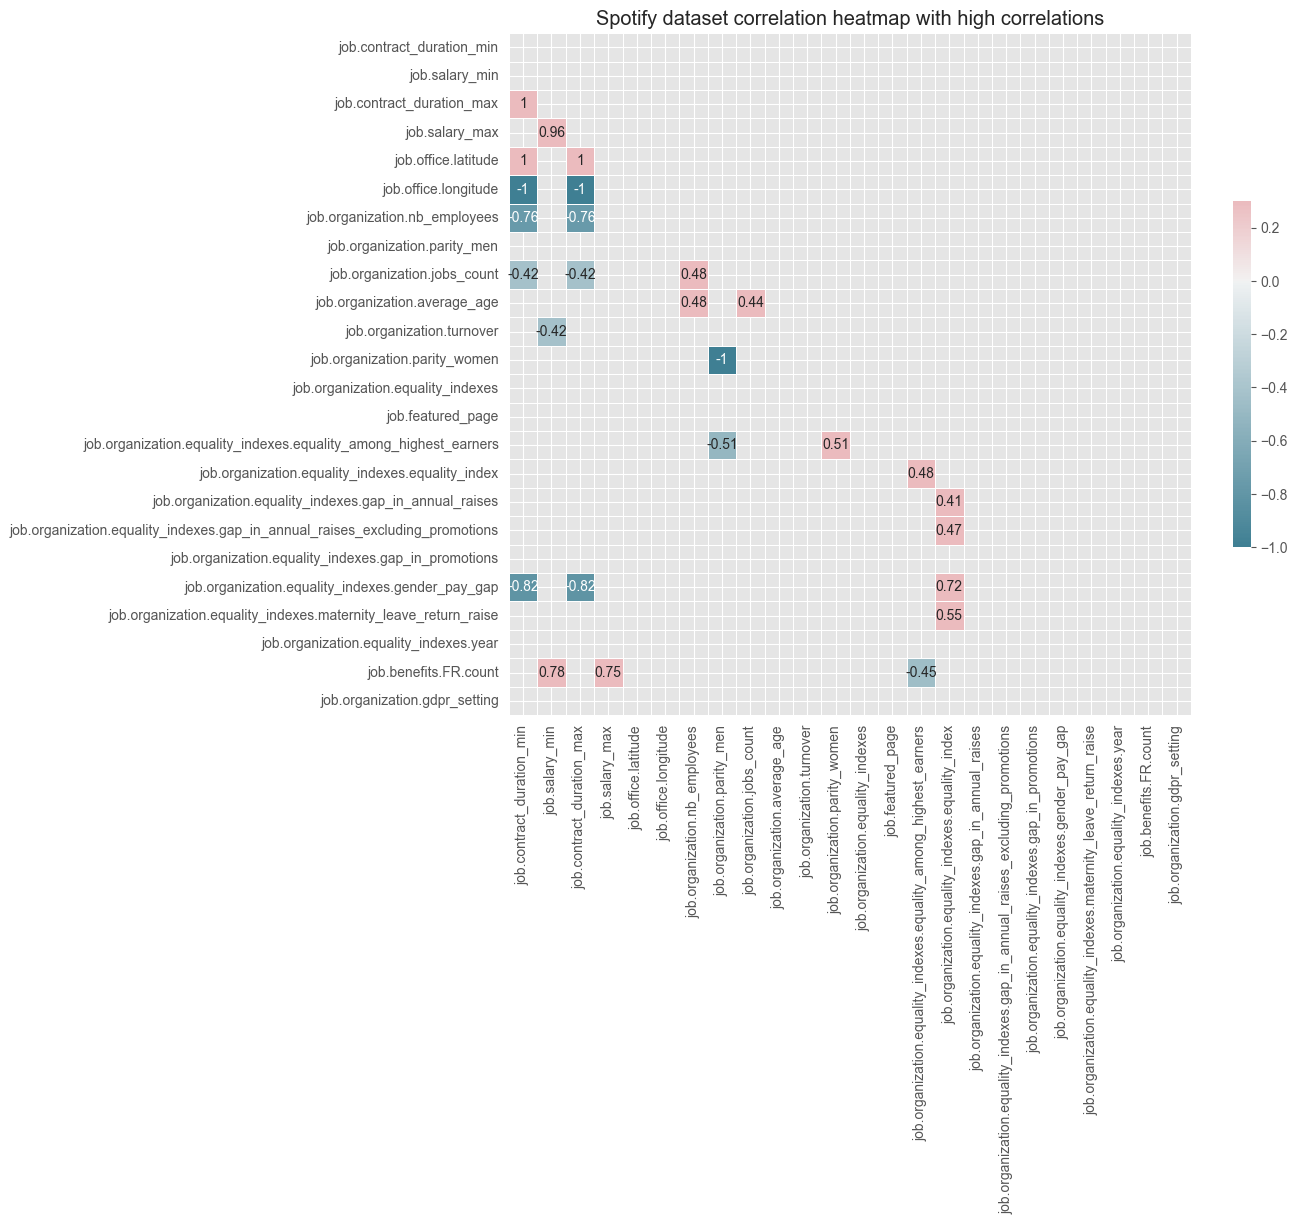

In [499]:
df_corr = df_welcome.select_dtypes('number').corr()
# la même, mais en ne gardant que les correlations les plus fortes

sns.set_style(style ='darkgrid')
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

neg_corr = df_corr[
    (df_corr < -0.4) |
    (df_corr > 0.4)
]

mask = np.triu(
    np.ones_like(
        neg_corr,
        dtype=bool
        )
    )

sns.heatmap(
    neg_corr,
    mask=mask,
    cmap=cmap,
    annot = True,
    vmax=.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.title('Spotify dataset correlation heatmap with high correlations')
plt.show()